In [6]:
%pip install pandas matplotlib
import pandas as pd
from io import StringIO
df = pd.read_csv('TreeCoverLoss_2001-2020_ByRegion.csv')


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [7]:
import os
os.listdir()

['.git',
 'TreeCoverLoss_2001-2020_ByRegion.csv',
 'Copy_of_scitech_assignment_1.ipynb',
 'README.md']

In [8]:
df.head()

,CountryCode,Year,TreeCoverLoss_ha,GrossEmissions_Co2_all_gases_Mg
0,AFG,2001,88.092712,2.226891e+04
1,AGO,2001,101220.621500,3.687662e+07
2,AIA,2001,3.878461,6.267003e+02
3,ALA,2001,396.934826,7.589787e+04
4,ALB,2001,3729.021031,1.333223e+06


In [9]:
df.shape

(3967, 4)

In [10]:
df.columns

Index(['CountryCode', 'Year', 'TreeCoverLoss_ha',
       'GrossEmissions_Co2_all_gases_Mg'],
      dtype='str')

In [11]:
df.dtypes

CountryCode                            str
Year                                 int64
TreeCoverLoss_ha                   float64
GrossEmissions_Co2_all_gases_Mg    float64
dtype: object

In [12]:
df.isna().sum()

CountryCode                        0
Year                               0
TreeCoverLoss_ha                   0
GrossEmissions_Co2_all_gases_Mg    0
dtype: int64

In [13]:
df[df["TreeCoverLoss_ha"] > 2000]

,CountryCode,Year,TreeCoverLoss_ha,GrossEmissions_Co2_all_gases_Mg
1,AGO,2001,101220.621500,3.687662e+07
4,ALB,2001,3729.021031,1.333223e+06
6,ARG,2001,147805.950400,3.160782e+07
9,AUS,2001,218816.302100,3.242429e+07
10,AUT,2001,6926.269008,2.785495e+06
...,...,...,...,...
3958,VNM,2020,207640.591800,1.554150e+08
3959,VUT,2020,3935.034108,2.478762e+06
3964,ZAF,2020,62247.300630,4.492736e+07
3965,ZMB,2020,163028.437800,5.971516e+07


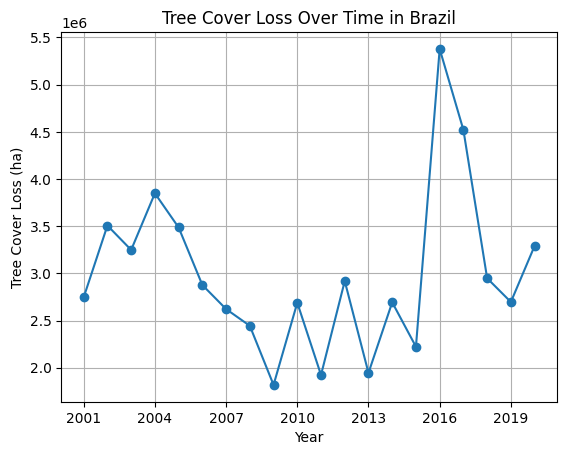

In [14]:
import matplotlib.pyplot as plt
country_code = 'BRA'
country_df = df[df['CountryCode'] == country_code]
plt.plot(country_df['Year'], country_df['TreeCoverLoss_ha'], marker='o')
plt.xticks(country_df['Year'][::3])
plt.xlabel('Year')
plt.ylabel('Tree Cover Loss (ha)')
plt.title(f'Tree Cover Loss Over Time in Brazil')
plt.grid(True)

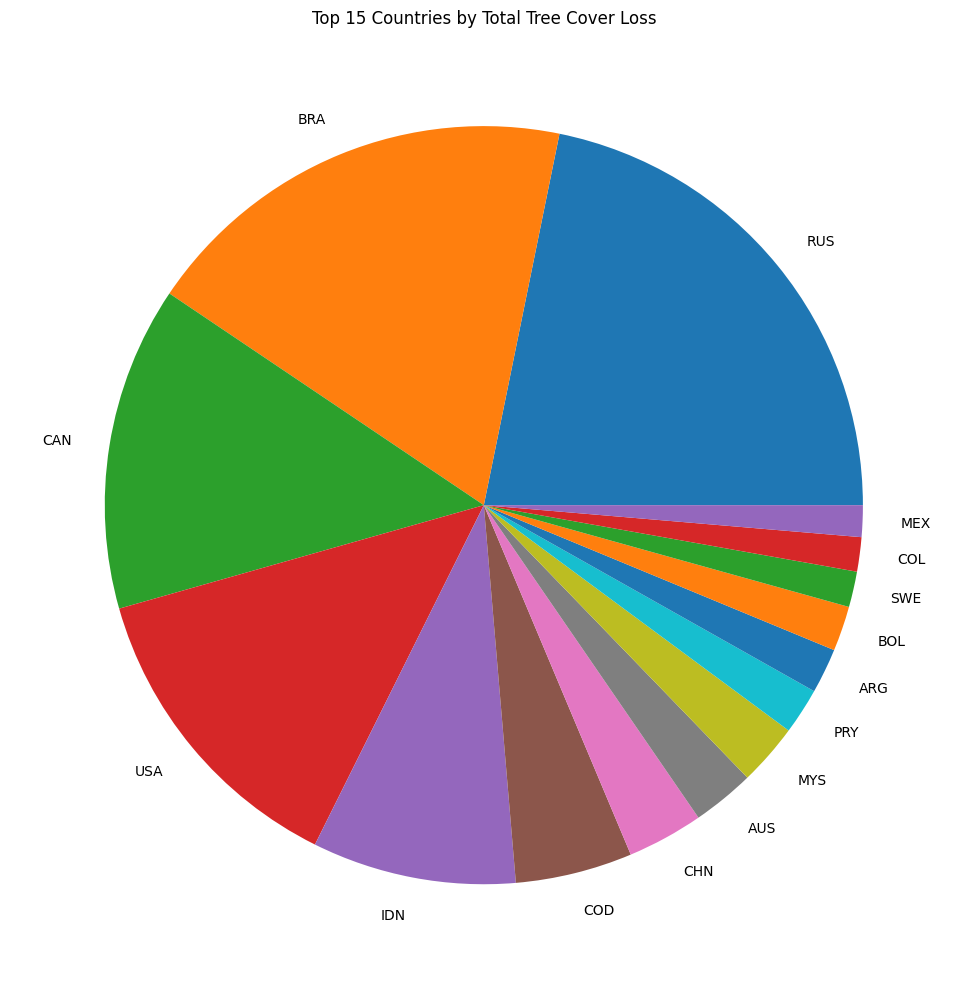

In [15]:
country_loss = (df.groupby("CountryCode")["TreeCoverLoss_ha"]
    .sum()
    .reset_index())

top15 = (country_loss
    .sort_values(by="TreeCoverLoss_ha", ascending=False)
    .head(15))

plt.figure(figsize=(10,10))
plt.pie( top15["TreeCoverLoss_ha"],
    labels=top15["CountryCode"])
plt.title("Top 15 Countries by Total Tree Cover Loss")
plt.tight_layout()
plt.show()